## HW Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('dataset/youtube_statistics.xlsx')
df.sample(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
792,2017-11-18,BYN : The Broker Code,Be YouNick,23,10:10:03,"kano|""best gift for kids""|""grime""|""kano comput...",622752,32184,1173,1929,False,False,False,Follow us on - \nInstagram : https://www.insta...,12,815,21,2017-11-16
7878,2017-12-26,டிடிவி தினகரன் வெற்றிக்கு பின் ஆர்.கே.நகர் மக்...,Sathiyam News,25,12:20:18,"sathiyam news today|""sathiyam news live today""...",179984,0,0,198,False,True,False,Connect with Sathiyam TV online: http://sathiy...,10,219,58,2017-12-25
7339,2017-12-23,"Tiger Zinda Hai Public Review | Salman Khan, K...",Movie Talkies,24,01:30:01,"Tiger Zinda Hai Movie Public Review|""Tiger Zin...",266296,5911,364,352,False,False,False,For More Updates:\n\nSubscribe to: https://www...,11,236,88,2017-12-22


## Description Analisys

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
numeric_col= df.select_dtypes(include=['int64']).columns
object_col = df.select_dtypes(include=['object']).columns
bool_col = df.select_dtypes(include=['bool']).columns
date_time_col = df.select_dtypes(include=['datetime64[ns]']).columns

In [8]:
print("Numeric Columns:")
display(df[numeric_col].describe().map('{:.2f}'.format).T)
print("Object Columns:")
display(df[object_col].describe())
print("Boolean Columns:")
display(df[bool_col].describe())
print("Date Time Columns:")
display(df[date_time_col].describe())

Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


Object Columns:


,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


Boolean Columns:


,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


Date Time Columns:


,publish_date
count,36791
mean,2018-02-24 11:20:36.334973440
min,2017-05-27 00:00:00
25%,2017-12-31 00:00:00
50%,2018-02-23 00:00:00
75%,2018-04-23 00:00:00
max,2018-06-13 00:00:00


## Univariate Analisys

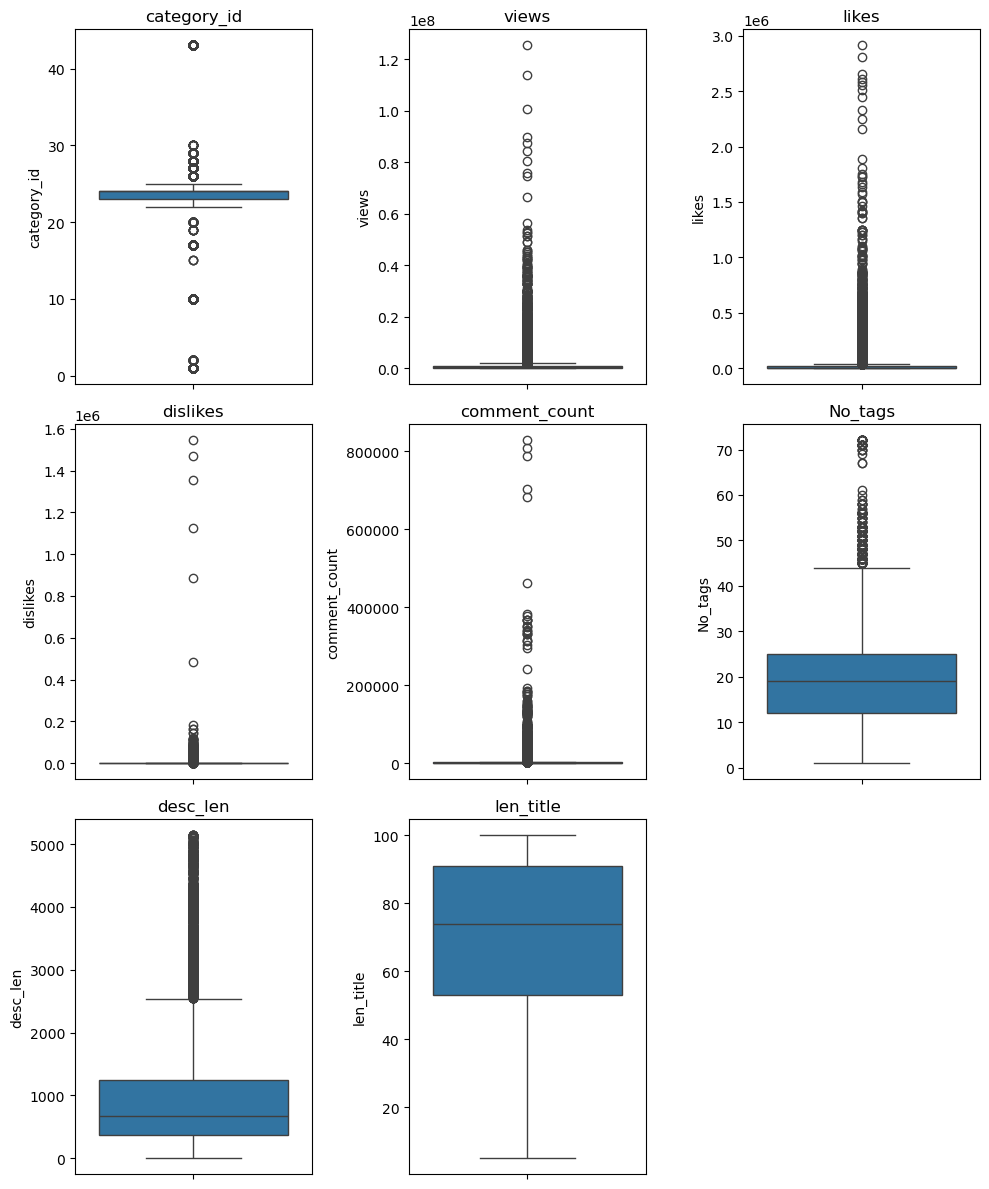

In [14]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
df[numeric_col].describe().map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


In [21]:
# IQR, min, max, quantile 90%, text setiap kolom numerik
for col in numeric_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    min_val = df[col].min()
    max_val = df[col].max()
    q90 = df[col].quantile(0.9)
    print(f"{col} - Min: {min_val}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, 90th Quantile: {q90},Max: {max_val}")

category_id - Min: 1, Lower Bound: 21.5, Upper Bound: 25.5, 90th Quantile: 25.0,Max: 43
views - Min: 4024, Lower Bound: -895937.25, Upper Bound: 1828172.75, 90th Quantile: 2038234.0,Max: 125432237
likes - Min: 0, Lower Bound: -18945.0, Upper Bound: 33919.0, 90th Quantile: 54194.0,Max: 2912710
dislikes - Min: 0, Lower Bound: -1275.5, Upper Bound: 2416.5, 90th Quantile: 2876.0,Max: 1545017
comment_count - Min: 0, Lower Bound: -1764.25, Upper Bound: 3161.75, 90th Quantile: 4175.0,Max: 827755
No_tags - Min: 1, Lower Bound: -7.5, Upper Bound: 44.5, 90th Quantile: 32.0,Max: 72
desc_len - Min: 3, Lower Bound: -935.5, Upper Bound: 2540.5, 90th Quantile: 1995.0,Max: 5136
len_title - Min: 5, Lower Bound: -4.0, Upper Bound: 148.0, 90th Quantile: 98.0,Max: 100


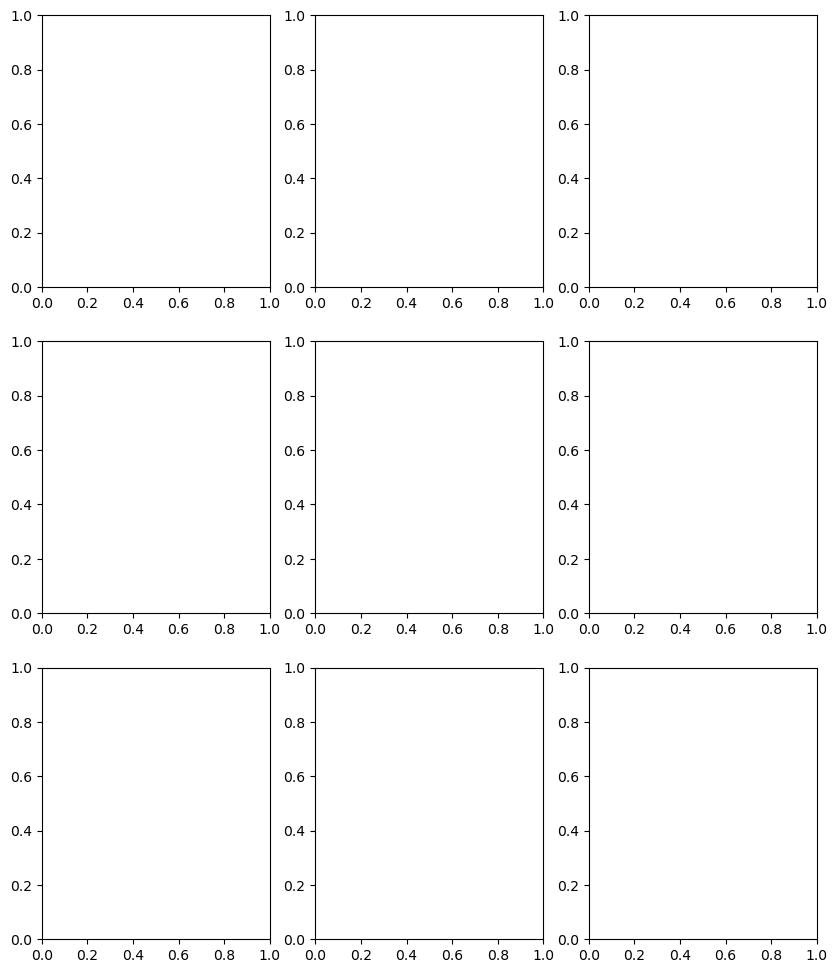

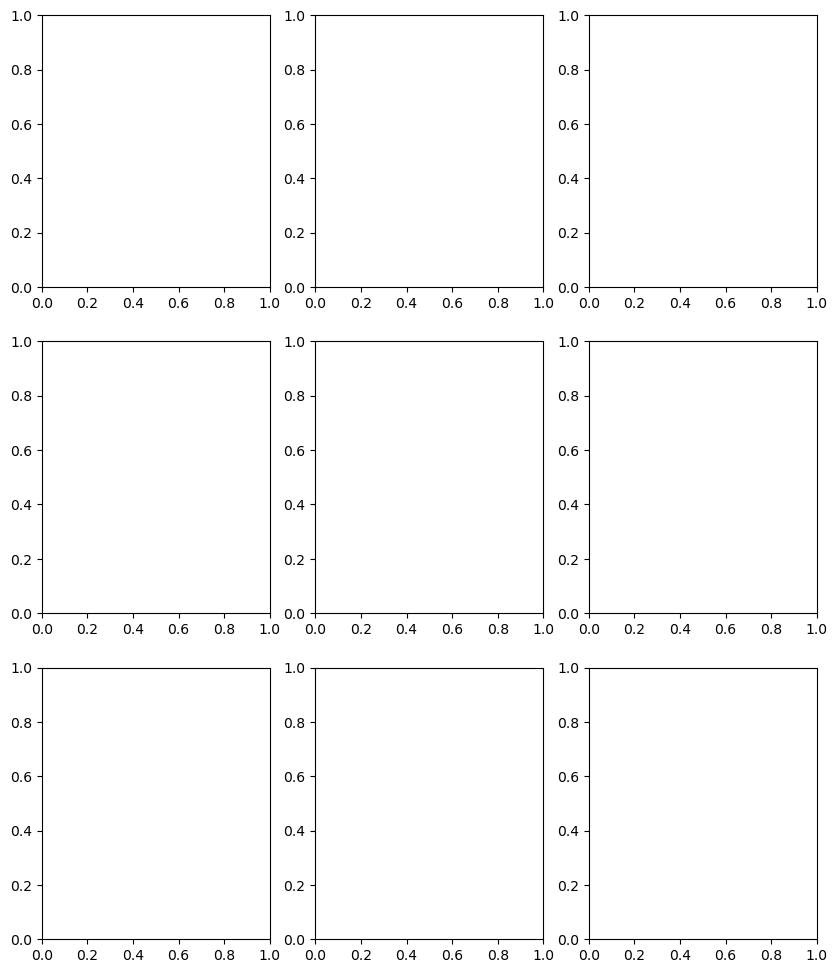

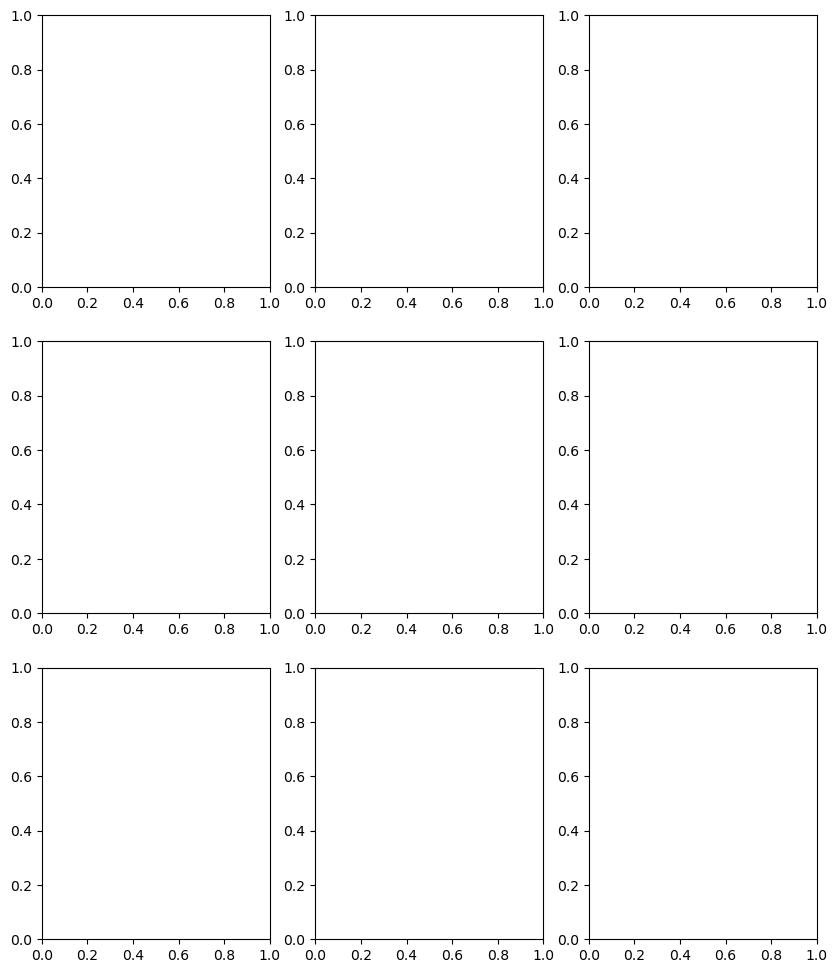

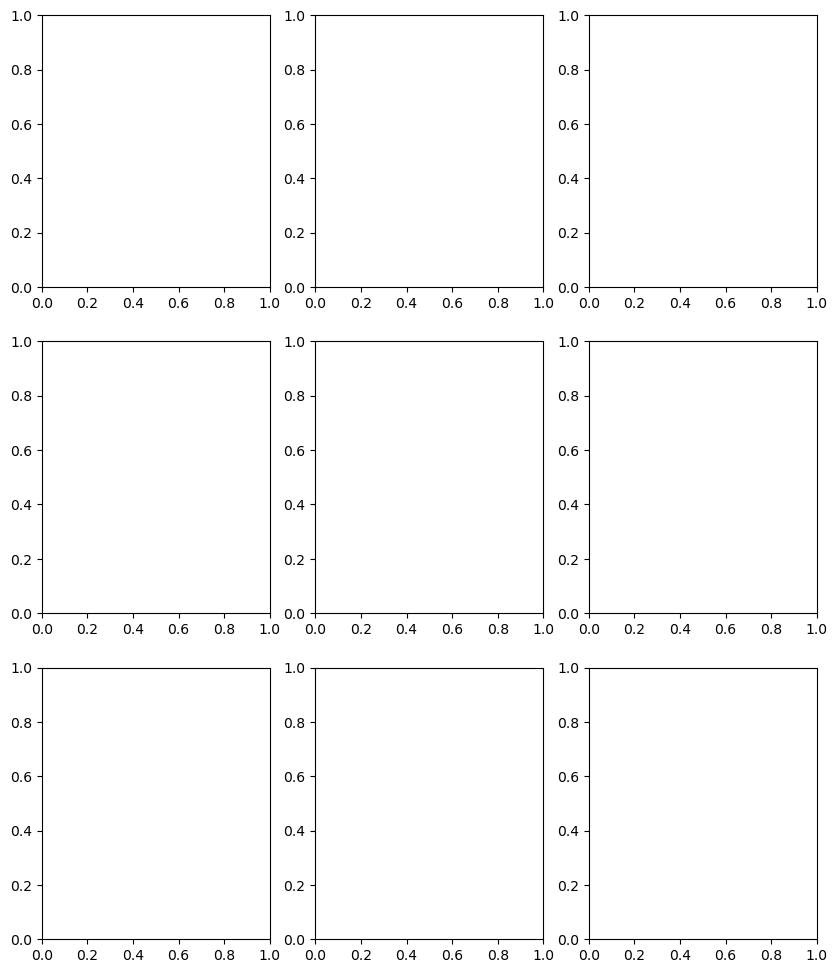

In [27]:
# histogram untuk setiap kolom numerik dalam 3 colom 3 baris
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(10, 12))
axes = axes.flatten()
plt.show()

## Multivariate Analisys